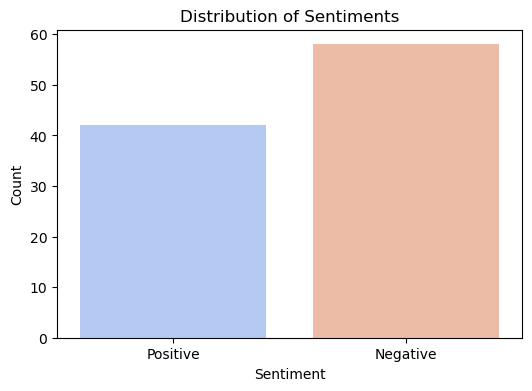

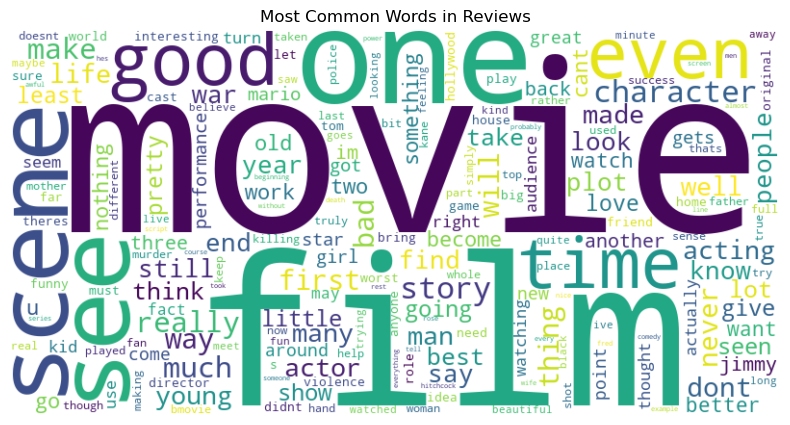

Epoch 1/20


c:\Users\Joel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.3556 - loss: 0.6965 - val_accuracy: 0.7000 - val_loss: 0.6892
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6269 - loss: 0.6869 - val_accuracy: 0.6500 - val_loss: 0.6638
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6504 - loss: 0.6666 - val_accuracy: 0.7000 - val_loss: 0.6399
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.7084 - loss: 0.6063 - val_accuracy: 0.8000 - val_loss: 0.4943
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 1.0000 - loss: 0.2954 - val_accuracy: 0.8000 - val_loss: 0.3744
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 1.0000 - loss: 0.0342 - val_accuracy: 0.6000 - val_loss: 1.4723
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 1.0000 - loss: 0.0143 - val_accuracy: 0.7500 - val_loss: 1.1566
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.8000 - val_loss: 1

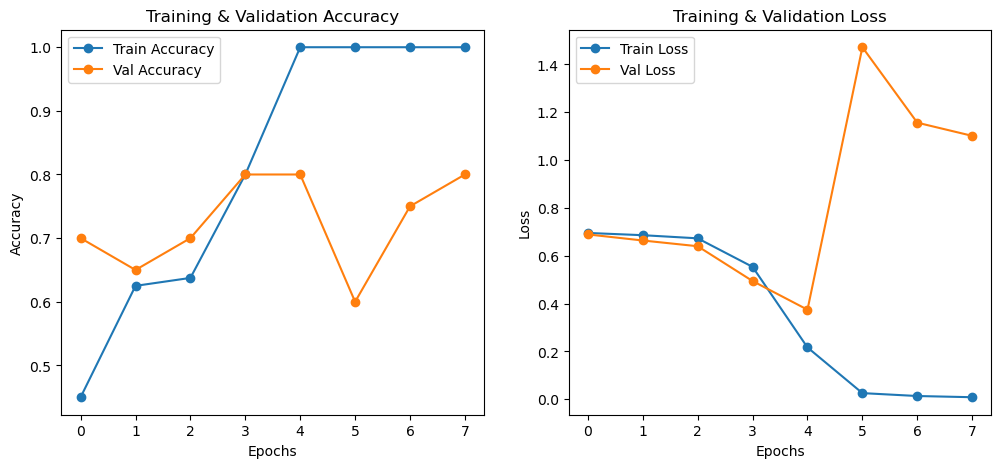

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


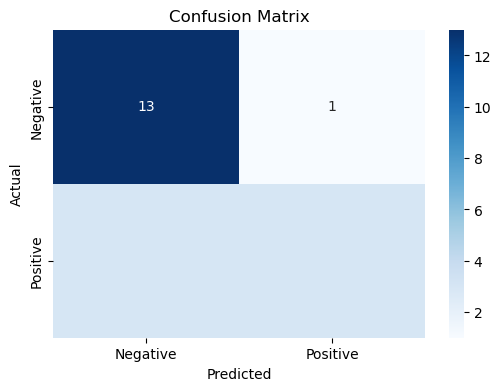

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.75      0.50      0.60         6

    accuracy                           0.80        20
   macro avg       0.78      0.71      0.73        20
weighted avg       0.79      0.80      0.79        20

Review: stephen hawkings is a genius he is the king of geniuses watching this movie makes me feel dumb but i...
Predicted Sentiment: positive

Review: the story is about a psychic woman tory who returns to her hometown and begins reliving her traumati...
Predicted Sentiment: negative

Review: oh god i must have seen this when i was only  or twelve dont ask how i may have been young but i was...
Predicted Sentiment: negative

Review: fate leads walter sparrow to come in possession of a mysterious novel that has eerie similarities an...
Predicted Sentiment: negative

Review: we brought this film as a joke for a friend and could of been our wor

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('IMDB Dataset.csv')

# Select first 100 samples
df = df.head(100)

# Convert labels to binary values
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

# 1️⃣ Data Distribution (Positive vs Negative Reviews)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["sentiment"].map({1: "Positive", 0: "Negative"}), palette="coolwarm")
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Text preprocessing function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    return text

df["review"] = df["review"].apply(clean_text)

# 2️⃣ Word Cloud for Most Common Words
text_data = " ".join(df["review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["review"])
sequences = tokenizer.texts_to_sequences(df["review"])

# Determine appropriate padding length
max_length = int(np.percentile([len(seq) for seq in sequences], 90))
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post")

# Train-Test Split (80-20)
train_size = int(0.8 * len(padded_sequences))
X_train, X_test = padded_sequences[:train_size], padded_sequences[train_size:]
y_train, y_test = df["sentiment"][:train_size], df["sentiment"][train_size:]

# Model Architecture
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=4, callbacks=[early_stopping])

# 3️⃣ Training & Validation Accuracy/Loss Plot
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy", marker="o")
plt.plot(history.history["val_accuracy"], label="Val Accuracy", marker="o")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss", marker="o")
plt.plot(history.history["val_loss"], label="Val Loss", marker="o")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Predictions
predictions = model.predict(X_test)
pred_labels = [1 if p > 0.5 else 0 for p in predictions]

# 4️⃣ Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, pred_labels))

# Print Predictions
for review, pred in zip(df["review"][train_size:], pred_labels):
    sentiment = "positive" if pred == 1 else "negative"
    print(f"Review: {review[:100]}...\nPredicted Sentiment: {sentiment}\n")


In [2]:
from sklearn.metrics import accuracy_score

# Compute Accuracy Score
accuracy = accuracy_score(y_test, pred_labels)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 80.00%
